# 고객 구매 데이터

In [7]:
import pandas as pd

data = pd.read_excel('CustomerDataSet.xls')
data

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435
5,10,34,17,6,2896
6,11,40,20,8,2869
7,12,40,8,2,1236
8,14,9,9,8,2435
9,15,36,7,2,1764


In [9]:
# 데이터 복사본
data2 = data.copy()

# 거리계산을 위해 정규화 전처리 진행
from sklearn.preprocessing import MinMaxScaler
data2[['ItemsBought','ItemsReturned']] = MinMaxScaler().fit_transform(
    data2[['ItemsBought','ItemsReturned']]
)
data2

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,0.878049,0.454545,2,1365
1,5,0.804878,0.818182,5,2764
2,6,1.000000,0.000000,1,1343
3,8,0.097561,0.545455,4,2435
4,9,0.024390,0.318182,3,2435
5,10,0.609756,0.772727,6,2896
6,11,0.756098,0.909091,8,2869
7,12,0.756098,0.363636,2,1236
8,14,0.000000,0.409091,8,2435
9,15,0.658537,0.318182,2,1764


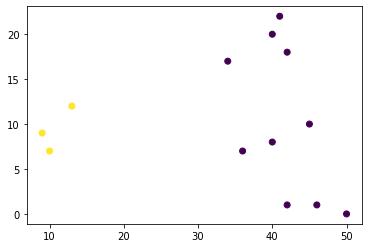

In [16]:
import matplotlib.pyplot as plt

# 군집분석
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)
pred = model.fit_predict(data2[['ItemsBought','ItemsReturned']])

plt.scatter( 
    data["ItemsBought"], 
    data["ItemsReturned"],
    c = pred # color : 같은 값끼리 같은 색을 가짐
) 

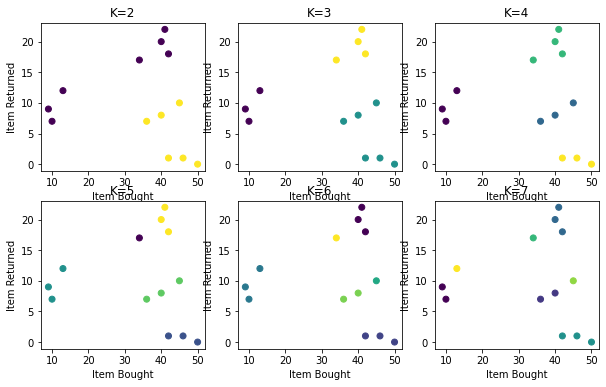

In [14]:
import matplotlib.pyplot as plt

# 군집분석
from sklearn.cluster import KMeans
# 여러가지 군집 갯수를 테스트
plt.figure(figsize=(10,6))
for k in range(2,8):
    model = KMeans(n_clusters = k)
    pred = model.fit_predict(data2[['ItemsBought','ItemsReturned']])
    plt.subplot(2,3,k-1)
    plt.title(f'K={k}')
    plt.xlabel('Item Bought')
    plt.ylabel('Item Returned')
    plt.scatter( 
        data["ItemsBought"], 
        data["ItemsReturned"],
        c = pred # color : 같은 값끼리 같은 색을 가짐
    ) 

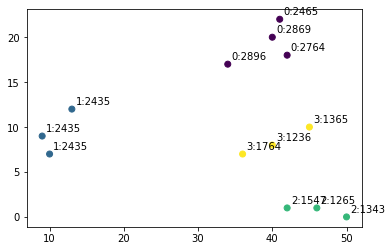

In [21]:
# 군집분석
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
pred = model.fit_predict(data2[["ItemsBought","ItemsReturned"]])

#군집별 색깔 지정
plt.scatter( 
    data["ItemsBought"], 
    data["ItemsReturned"],
    c = pred                # color : 같은 값끼리 같은 색을 가짐
) 

#각 데이터에 제품번호 출력
for index,c_id,bought,returned,zipcode,product in data.itertuples():
    plt.annotate( f"{pred[index]}:{product}",(bought+0.5, returned+0.5))
plt.show()